(300, 700)

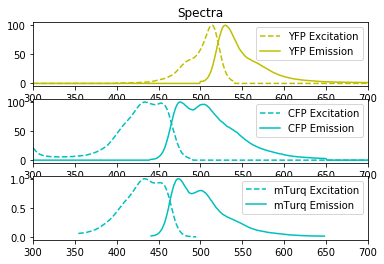

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mt

os.chdir('/Users/diane/Lab Work/Fluorostat')
#Load the specra of each fluorophore
YFP = pd.read_csv("YFP.csv")
CFP = pd.read_csv("CFP.csv")
mTurq = pd.read_csv("mTurq.csv")

#Plot the two spectra
plt.subplot(3,1,1)
plt.plot(YFP["Wavelength"],YFP["Excitation"], "y--")
plt.plot(YFP["Wavelength"],YFP["Emission"], "y")
plt.legend(["YFP Excitation", "YFP Emission"])
plt.xlim([300,700])
plt.title("Spectra")
plt.subplot(3,1,2)
plt.plot(CFP["Wavelength"],CFP["Excitation"], "c--")
plt.plot(CFP["Wavelength"],CFP["Emission"], "c")
plt.legend(["CFP Excitation", "CFP Emission"])
plt.xlim([300,700])
plt.subplot(3,1,3)
plt.plot(mTurq["wavelength"],mTurq["mTurquoise ab"], "c--")
plt.plot(mTurq["wavelength"],mTurq["mTurquoise em"], "c")
plt.legend(["mTurq Excitation", "mTurq Emission"])
plt.xlim([300,700])



In [5]:
#%%

#Load in the different filters
path = '/Users/diane/Lab Work/Fluorostat/'
yfp_em = pd.read_csv(path + "yfp_emission", sep= "\t")
yfp_ex = pd.read_csv(path + "yfp_excitation", sep= "\t")
cfp_em = pd.read_csv(path + "cfp_emission", sep= "\t")
cfp_ex = pd.read_csv(path + "cfp_excitation", sep= "\t")
#GFP exitation filter doesn't have downloadable CSV has a mean of 525 with 18nm spread on either side
gfp_em = np.zeros([2, len(YFP["Wavelength"])])
gfp_em[0,:] = YFP["Wavelength"]
gfp_em_min = 525 - 9
gfp_em_max = 525 + 9
min_mask = gfp_em[0,:] > gfp_em_min
max_mask = gfp_em[0,:] < gfp_em_max
mask = min_mask & max_mask
gfp_em[1,:] = mask*100
gfp_ex = pd.read_csv(path + "gfp_excitation", sep= "\t")


In [6]:

#%%
#Load in the Dichroics
ex_dichroic = pd.read_csv(path + "DMLP490R_emissiondichroic", delim_whitespace = True)
em_dichroic = pd.read_csv(path + "DMLP505R_excitationdichroic", delim_whitespace = True)





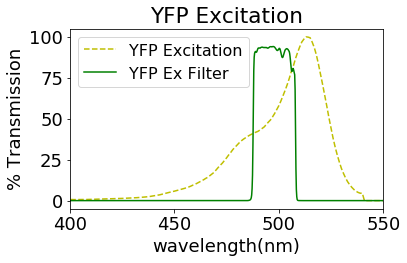

In [7]:
#%%
plt.figure()

mt.rcParams.update({'font.size': 18})

#mt.rc('legend', labelsize=12) 
#plot each on 
#plt.subplot(2,1,1)
plt.plot(YFP["Wavelength"],YFP["Excitation"], "y--")
plt.plot(yfp_ex["Wavelength (nm)"], yfp_ex["% Transmission"], "g")
plt.legend(["YFP Excitation","YFP Ex Filter"], loc = 2, prop={'size': 16})
plt.title("YFP Excitation")
plt.xlim([400,550])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission")
plt.tight_layout()
plt.savefig(path + "YFP_Excitation.png")


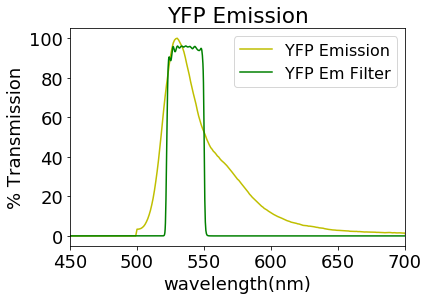

In [8]:

#%%
plt.figure()
plt.plot(YFP["Wavelength"],YFP["Emission"], "y")
plt.plot(yfp_em["Wavelength (nm)"], yfp_em["% Transmission"], "g")
plt.legend([ "YFP Emission", "YFP Em Filter"],loc = 1, prop={'size': 16})
plt.title("YFP Emission")
plt.xlim([450,700])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission")
plt.savefig(path + "YFP_Emission.png")


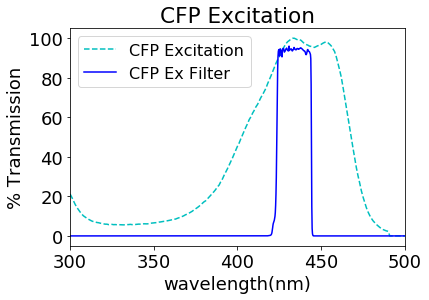

In [9]:
#%%
'''
plt.figure()
#plt.subplot(2,1,2)
plt.plot(YFP["Wavelength"],YFP["Excitation"], "y--")
plt.plot(YFP["Wavelength"],YFP["Emission"], "y")
plt.plot(gfp_em[0,:], gfp_em[1,:], "y")
plt.plot(gfp_ex["Wavelength (nm)"], gfp_ex["% Transmission"], "g")
plt.legend(["YFP Excitation", "YFP Emission", "GFP Em Filter", "GFP Ex Filter"])

plt.xlim([200,700])

'''

plt.figure()

#plt.subplot(2,1,1)
plt.plot(CFP["Wavelength"],CFP["Excitation"], "c--")
plt.plot(cfp_ex["Wavelength (nm)"], cfp_ex["% Transmission"], "b")
plt.title("CFP Excitation")
plt.legend(["CFP Excitation", "CFP Ex Filter"],loc = 2, prop={'size': 16})
plt.xlim([300,500])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission")
plt.savefig(path + "CFP_Excitation.png")


'\nplt.figure()\n#plt.subplot(2,1,2)\nplt.plot(mTurq["wavelength"],mTurq["mTurquoise ab"]* 100, "c--") \nplt.plot(mTurq["wavelength"],mTurq["mTurquoise em"]* 100, "c")\nplt.plot(cfp_em["Wavelength (nm)"], cfp_em["% Transmission"], "c")\nplt.plot(cfp_ex["Wavelength (nm)"], cfp_ex["% Transmission"], "b")\nplt.legend(["mTurq Excitation", "mTurq Emission", "CFP Em Filter", "CFP Ex Filter"])\nplt.xlim([200,700])\nplt.xlabel("wavelength(nm)")\nplt.ylabel("% Transmission")\n'

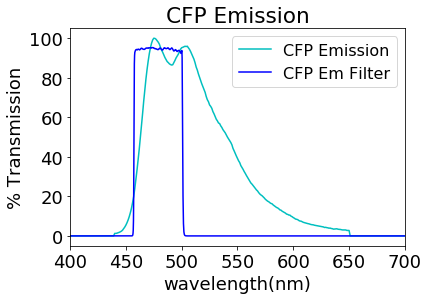

In [10]:
#%%

plt.figure()
plt.plot(CFP["Wavelength"],CFP["Emission"], "c")
plt.plot(cfp_em["Wavelength (nm)"], cfp_em["% Transmission"], "b")
plt.title("CFP Emission")
plt.legend(["CFP Emission", "CFP Em Filter"], loc = 1, prop={'size': 16})
plt.xlim([400,700])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission")
plt.savefig(path + "CFP_Emission.png")
'''
plt.figure()
#plt.subplot(2,1,2)
plt.plot(mTurq["wavelength"],mTurq["mTurquoise ab"]* 100, "c--") 
plt.plot(mTurq["wavelength"],mTurq["mTurquoise em"]* 100, "c")
plt.plot(cfp_em["Wavelength (nm)"], cfp_em["% Transmission"], "c")
plt.plot(cfp_ex["Wavelength (nm)"], cfp_ex["% Transmission"], "b")
plt.legend(["mTurq Excitation", "mTurq Emission", "CFP Em Filter", "CFP Ex Filter"])
plt.xlim([200,700])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission")
'''



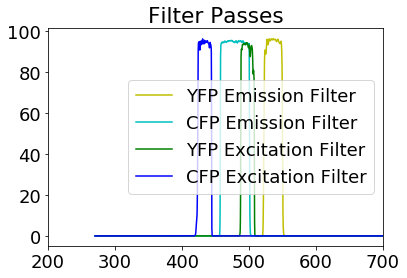

In [11]:
#%%
#plot them all together
plt.figure()
plt.title("Filter Passes")
plt.plot(yfp_em["Wavelength (nm)"], yfp_em["% Transmission"], "y")
plt.plot(cfp_em["Wavelength (nm)"], cfp_em["% Transmission"], "c")
plt.plot(yfp_ex["Wavelength (nm)"], yfp_ex["% Transmission"], "g")
plt.plot(cfp_ex["Wavelength (nm)"], cfp_ex["% Transmission"], "b")
plt.xlim([200,700])
plt.legend(["YFP Emission Filter","CFP Emission Filter","YFP Excitation Filter","CFP Excitation Filter"])


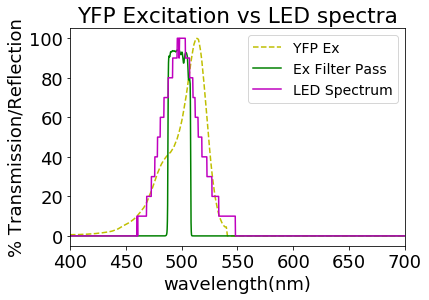

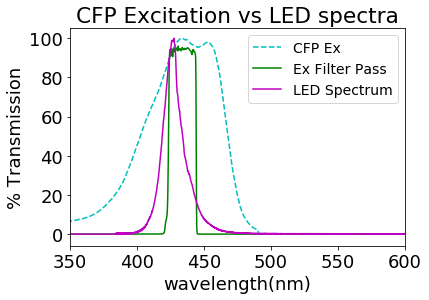

In [12]:
#%%

#Load in the different lasers
CFP_LED =pd.read_csv(path + "M430L4_violet", sep= "\t")
#YFP_LED_1 = pd.read_csv(path + "M490L4_blue", sep= "\t")
#YFP_LED_2 = pd.read_csv(path + "M505L3_cyan", sep= "\t")
YFP_LED_3 = pd.read_csv(path + "M505L4_cyan", sep= "\t")

plt.figure()
#plot each on 
'''
plt.figure()
plt.plot(YFP["Wavelength"],YFP["Excitation"], "y--")
plt.plot(yfp_ex["Wavelength (nm)"], yfp_ex["% Transmission"], "g")
plt.plot(YFP_LED_1["Wavelength (nm)"], YFP_LED_1["Normalized Intensity"]*100,"b")
plt.plot
plt.title("YFP LED Spectrum")
plt.xlim([200,700])

plt.figure()
plt.plot(YFP["Wavelength"],YFP["Excitation"], "y--")
plt.plot(yfp_ex["Wavelength (nm)"], yfp_ex["% Transmission"], "g")
plt.plot(YFP_LED_2["Wavelength (nm)"], YFP_LED_2["Normalized Intensity"]*100,"b")
plt.plot
plt.title("YFP LED Spectrum")
plt.xlim([200,700])
'''
#plt.subplot(2,1,1)
plt.plot(YFP["Wavelength"],YFP["Excitation"], "y--")
plt.plot(yfp_ex["Wavelength (nm)"], yfp_ex["% Transmission"], "g")
#plt.plot(yfp_em["Wavelength (nm)"], yfp_em["% Transmission"], "y")
plt.plot(YFP_LED_3["Wavelength (nm)"], YFP_LED_3["Normalized Intensity"]*100,"m")
plt.legend(["YFP Ex", "Ex Filter Pass", "LED Spectrum"], loc = 1, prop={'size': 14})
plt.title("YFP Excitation vs LED spectra")
plt.xlim([400,700])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission/Reflection")
plt.savefig(path + "YFP_LED.png")

plt.figure()
#plt.subplot(2,1,2)
plt.plot(CFP["Wavelength"],CFP["Excitation"], "c--")
plt.plot(cfp_ex["Wavelength (nm)"], cfp_ex["% Transmission"], "g")
#plt.plot(cfp_em["Wavelength (nm)"], cfp_em["% Transmission"], "b")
plt.plot(CFP_LED["Wavelength (nm)"], CFP_LED["Normalized Intensity"]*100,"m")
plt.legend(["CFP Ex", "Ex Filter Pass", "LED Spectrum"], loc = 1, prop={'size': 14})
plt.title("CFP Excitation vs LED spectra")
plt.xlim([350,600])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission")
plt.savefig(path + "CFP_LED.png")


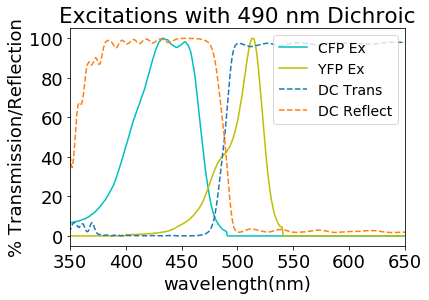

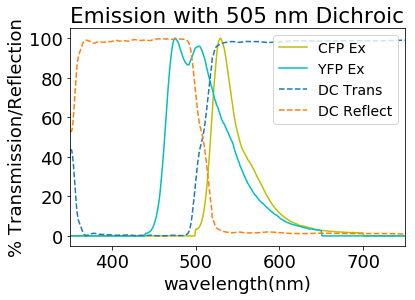

In [13]:
#%%
#Dichroic Locations

#excitation Dichroic, wants to separate excitation wavelengths
plt.title("Excitations with 490 nm Dichroic")
plt.plot(CFP["Wavelength"],CFP["Excitation"], "c")
plt.plot(YFP["Wavelength"],YFP["Excitation"], "y")
plt.plot(ex_dichroic["Wavelength(nm)"], ex_dichroic["%_Transmission"],"--")
plt.plot(ex_dichroic["Wavelength(nm)"], ex_dichroic["%_Reflectance"],"--")
plt.legend(["CFP Ex", "YFP Ex", "DC Trans", "DC Reflect"], loc = 1, prop={'size': 14})
plt.xlim([350,650])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission/Reflection")
plt.savefig(path + "Dichroic_490.png")

#emission Dichroic, separate emission wavelenghts
plt.figure()
plt.title("Emission with 505 nm Dichroic")
plt.plot(YFP["Wavelength"],YFP["Emission"], "y")
plt.plot(CFP["Wavelength"],CFP["Emission"], "c")
plt.plot(em_dichroic["Wavelength(nm)"], em_dichroic["%_Transmission"],"--")
plt.plot(em_dichroic["Wavelength(nm)"], em_dichroic["%_Reflectance"],"--")
plt.legend(["CFP Ex", "YFP Ex", "DC Trans", "DC Reflect"], loc = 1, prop={'size': 14})
plt.xlim([350,750])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission/Reflection")
plt.savefig(path + "Dichroic_505.png")


(400, 700)

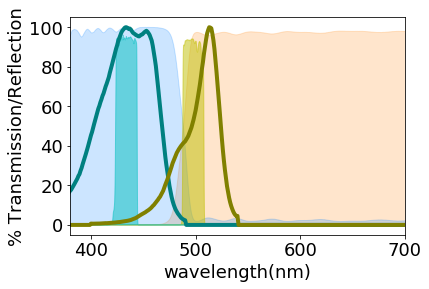

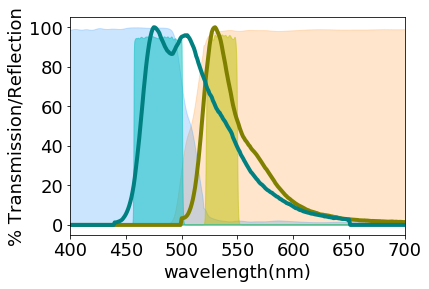

In [14]:

#%%
#Plot all my Filters and see if they overlap 
#Excitations

plt.fill_between(ex_dichroic["Wavelength(nm)"], ex_dichroic["%_Transmission"],alpha = .2, color = [1,.5,0])
plt.fill_between(ex_dichroic["Wavelength(nm)"], ex_dichroic["%_Reflectance"],alpha = .2, color = [0,.5,1])
plt.fill_between(yfp_ex["Wavelength (nm)"], yfp_ex["% Transmission"],  color = "y", alpha = .5)
plt.fill_between(cfp_ex["Wavelength (nm)"], cfp_ex["% Transmission"], color = "c", alpha = .5)
plt.plot(CFP["Wavelength"],CFP["Excitation"], "c", lw = 4, color = [0,.5,.5])
plt.plot(YFP["Wavelength"],YFP["Excitation"], "y", lw = 4, color = [.5,.5,0])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission/Reflection")
plt.xlim([380,700])

#Emissions
plt.figure()
plt.plot(YFP["Wavelength"],YFP["Emission"], "y", lw = 4, color = [.5,.5,0])
plt.plot(CFP["Wavelength"],CFP["Emission"], "c", lw = 4,color = [0,.5,.5])
plt.fill_between(em_dichroic["Wavelength(nm)"], em_dichroic["%_Transmission"], alpha = .2,color = [1,.5,0])
plt.fill_between(em_dichroic["Wavelength(nm)"], em_dichroic["%_Reflectance"], alpha = .2, color = [0,.5,1])
plt.fill_between(yfp_em["Wavelength (nm)"], yfp_em["% Transmission"], color ="y", alpha = .5)
plt.fill_between(cfp_em["Wavelength (nm)"], cfp_em["% Transmission"], color = "c", alpha = .5)
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission/Reflection")
plt.xlim([400,700])



In [18]:
#%% 
#Convert all the various x steps to 1nm steps so I can mutiply them by each other

def int_wavelengths(inputspectra, wavelengthlabel, emexdata, numcols, upper_cap = 700, lower_cap = 400):
    wavelengths = np.linspace(lower_cap, upper_cap, 301)
    x = 0
    nm = np.zeros([301,numcols])
    for i in range(len(YFP)):
        lower_cap  = wavelengths[x]
        #print(inputspectra[wavelengthlabel][i])
        if inputspectra[wavelengthlabel][i]> lower_cap:
            if numcols == 3:
                nm[x] = [lower_cap, inputspectra[emexdata[0]][x], inputspectra[emexdata[1]][x]]
            elif numcols == 2:
                nm[x] = [lower_cap, inputspectra[emexdata[0]][x]]
            x +=1 
        if inputspectra[wavelengthlabel][i] > upper_cap:
            break
    nm = pd.DataFrame(nm, columns = [wavelengthlabel]+ emexdata)
    return(nm)
#%%
YFP_nm = int_wavelengths(YFP, "Wavelength", ["Excitation", "Emission"], 3)
CFP_nm = int_wavelengths(CFP, "Wavelength", ["Excitation", "Emission"], 3)
yfp_em_nm = int_wavelengths(yfp_em, "Wavelength (nm)", ["% Transmission"], 2)
yfp_ex_nm = int_wavelengths(yfp_ex, "Wavelength (nm)", ["% Transmission"], 2)
cfp_em_nm = int_wavelengths(cfp_em, "Wavelength (nm)", ["% Transmission"], 2)
cfp_ex_nm = int_wavelengths(cfp_ex, "Wavelength (nm)", ["% Transmission"], 2)
ex_dichroic_nm = int_wavelengths(ex_dichroic, "Wavelength(nm)", ["%_Transmission", "%_Reflectance"], 3)
em_dichroic_nm = int_wavelengths(em_dichroic, "Wavelength(nm)", ["%_Transmission", "%_Reflectance"], 3)
CFP_LED_nm = int_wavelengths(CFP_LED, "Wavelength (nm)", ["Normalized Intensity"], 2)
#%%
YFP_LED_nm = int_wavelengths(YFP_LED_3, 'Wavelength (nm)', ['Normalized Intensity'], 2)



In [27]:
display(YFP_LED_3[1200:1400])

,Wavelength (nm),Normalized Intensity
1200,454.7,0.0
1201,454.9,0.0
1202,455.2,0.0
1203,455.4,0.0
1204,455.6,0.0
1205,455.8,0.0
1206,456.0,0.0
1207,456.3,0.0
1208,456.5,0.0
1209,456.7,0.0


In [ ]:
#%%
#Let's do a step by step trip through the optics

#start with individual excitation LEDs

#CFP
plt.figure()
plt.fill_between(CFP_LED["Wavelength (nm)"], CFP_LED["Normalized Intensity"]*100,alpha = .5, color = [0,1,1])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission/Reflection")
plt.xlim([400,700])
#YFP
plt.figure()
plt.fill_between(YFP_LED_3["Wavelength (nm)"], (YFP_LED_3["Normalized Intensity"]*100), alpha = .5, color = [1,1,0])
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission/Reflection")
plt.xlim([400,700])

#Waveform that gets through the excitation

#CFP
plt.figure()
plt.fill_between(CFP_LED["Wavelength (nm)"], CFP_LED["Normalized Intensity"]*100,alpha = .5, color = [0,1,1])
plt.fill_between(cfp_ex["Wavelength (nm)"], cfp_ex["% Transmission"], color = "c", alpha = .5)
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission/Reflection")
plt.xlim([400,700])
#YFP
plt.figure()
plt.fill_between(YFP_LED_3["Wavelength (nm)"], (YFP_LED_3["Normalized Intensity"]*100), alpha = .5, color = [1,1,0])
plt.fill_between(yfp_ex["Wavelength (nm)"], yfp_ex["% Transmission"],  color = "y", alpha = .5)
plt.xlabel("wavelength(nm)")
plt.ylabel("% Transmission/Reflection")
plt.xlim([400,700])
#Dichroic

#Incoming light after hitting sample

#Light let in by emission filters